https://www.infer-pub.com/questions/1049-which-country-will-have-published-the-second-most-top-tiered-journal-articles-on-artificial-intelligence-in-2022-according-to-the-oecd-s-ai-policy-observatory

I'm going to redo this based on what I've learned from the stock based questions

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

from lib import datadir

Country
China             AxesSubplot(0.125,0.125;0.775x0.755)
EU (27)           AxesSubplot(0.125,0.125;0.775x0.755)
United Kingdom    AxesSubplot(0.125,0.125;0.775x0.755)
United States     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Value, dtype: object

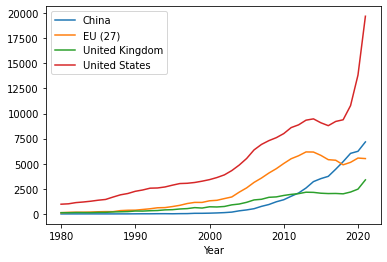

In [2]:
publications = pd.read_csv(datadir / 'AI publication time series by country.csv')

breakout_countries = ['United States', 'China', 'United Kingdom', 'EU (27)']

publications[publications['Country'].isin(breakout_countries)] \
    .set_index('Year') \
    .groupby('Country')['Value'] \
    .plot(legend=True)

looks linear within the last 5 years, but none of the trends are stationary (the statistical properties change over time)

In [3]:
by_country = pd.pivot_table(publications, index='Year', columns='Country', values='Value')
by_country.index = pd.PeriodIndex(by_country.index, freq='Y')
by_country

Country,Australia,Canada,China,EU (27),India,Japan,Korea,Switzerland,United Kingdom,United States
Year,,,,,,,,,,
1980,27.166667,79.950000,1.142857,122.259524,6.833333,41.083333,3.000000,8.973810,124.797619,968.842857
1981,24.583333,78.416667,NaN,159.020513,5.564103,54.353846,4.000000,18.285714,119.833333,1008.128388
1982,37.466667,75.350000,NaN,172.966667,8.833333,37.208333,2.875000,13.416667,138.666667,1127.916667
1983,29.366667,74.410714,2.700000,173.414286,6.333333,44.666667,5.666667,13.960714,135.190476,1189.023810
1984,40.033333,89.600000,3.833333,186.253968,8.700000,60.833333,10.166667,13.883333,131.281746,1266.138095
1985,41.166667,118.476191,3.000000,216.116667,8.416667,49.650000,1.000000,10.934524,154.500000,1366.013095
1986,50.755556,123.219048,2.833333,230.549242,12.333333,55.125000,7.000000,15.700000,158.564141,1441.960823
1987,41.750000,147.233333,1.833333,228.758547,16.833333,59.750000,9.833333,16.294231,197.208333,1679.827778
1988,49.616667,160.954545,4.666667,330.643173,6.250000,64.864044,7.750000,17.958333,214.950287,1902.103427


let's try a simulation based approach

In [4]:
def get_mean_se(ser):
    model = sm.tsa.ARIMA(ser, order=(1, 1, 0))
    results = model.fit()
    forecast_results = results.get_forecast()
    summary = forecast_results.summary_frame()
    return summary.loc['2022']

distributions = by_country.apply(get_mean_se)
distributions

/home/jonah/.virtualenvs/infer-pub/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/jonah/.virtualenvs/infer-pub/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/jonah/.virtualenvs/infer-pub/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Country,Australia,Canada,China,EU (27),India,Japan,Korea,Switzerland,United Kingdom,United States
mean,935.804341,2062.469289,7985.992245,5478.541182,251.953920,681.540426,233.022492,408.297531,4243.861302,25552.167376
mean_se,32.929155,65.417333,187.359642,184.598748,51.228922,30.715812,41.875691,18.788390,132.544357,582.498806
mean_ci_lower,871.264382,1934.253672,7618.774094,5116.734284,151.547077,621.338540,150.947646,371.472963,3984.079135,24410.490696
mean_ci_upper,1000.344299,2190.684905,8353.210395,5840.348079,352.360763,741.742312,315.097337,445.122099,4503.643469,26693.844057


(0.0, 12000.0)

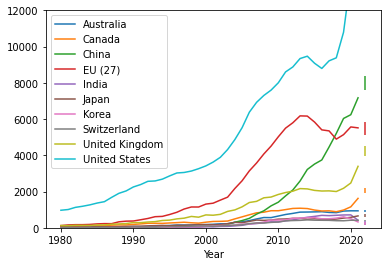

In [5]:
fig, ax = plt.subplots()
publications \
    .set_index('Year') \
    .groupby('Country')['Value'] \
    .plot(ax=ax, legend=True)

colors = pd.DataFrame([(l.get_label(), l.get_color()) for l in ax.get_lines()], columns=['Country', 'color']).set_index('Country')['color']

for country, summary in distributions.items():
    ax.errorbar(2022, summary['mean'], yerr=summary['mean_se']*2, ecolor=colors[country])
ax.set_ylim(0, 12_000)

Let's pretend that our standard error is an underestimate by a factor of 3 because I'm a coward.

In [6]:
samples = distributions.apply(lambda s: np.random.normal(s['mean'], 3*s['mean_se'], 10000))
samples

Country,Australia,Canada,China,EU (27),India,Japan,Korea,Switzerland,United Kingdom,United States
0,785.563895,2338.622541,7787.829151,4650.124536,296.974013,801.608942,309.755255,456.980374,4926.895048,23079.503931
1,967.058602,1880.818500,8298.916239,5004.519674,330.184608,611.410533,353.583173,342.747546,4385.136951,26821.152273
2,1157.349930,1992.942805,7185.558278,5867.482911,547.102663,741.750269,198.151748,463.182876,3751.701929,28297.545079
3,912.899031,2020.886242,8533.577283,5247.332123,359.781598,694.283762,323.329087,460.040332,3949.365416,24781.009480
4,769.878152,2214.739293,7720.221483,6774.644638,52.184228,633.976132,178.233885,417.924533,3949.664318,26231.632440
...,...,...,...,...,...,...,...,...,...,...
9995,1017.418787,2002.450334,7324.492504,4419.743687,204.930781,646.812154,84.713746,430.113257,3475.454176,26533.814325
9996,852.849900,2175.530286,8917.766879,5277.230563,215.632607,771.940814,368.587299,477.224284,3721.735069,22909.150387
9997,1006.162550,1901.185704,7542.627311,4895.744665,351.995039,581.550858,157.183876,362.059862,4976.447016,24538.912444
9998,850.021539,2191.559471,7411.168952,5392.453268,470.049239,693.978561,339.452090,420.646756,4033.886777,26792.970891


In [7]:
second_place = samples.apply(lambda s: s.sort_values(ascending=False).index[1], axis=1)
second_place

0       China
1       China
2       China
3       China
4       China
        ...  
9995    China
9996    China
9997    China
9998    China
9999    China
Length: 10000, dtype: object

<AxesSubplot:>

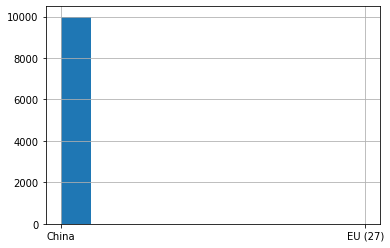

In [8]:
second_place.hist()

In [9]:
counts = second_place.value_counts()
counts /= counts.sum()
counts

China      0.9992
EU (27)    0.0008
dtype: float64